In [2]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("/Users/andreas/Desktop/03 - Le Wagon/data_merged_v1.csv")
df.head(5)

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2343962524.py:1: DtypeWarning: Columns (18,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/andreas/Desktop/03 - Le Wagon/data_merged_v1.csv")


,Organization Name,Organization Name URL,IPO Status,Company Type,Last Funding Type,Industries,Headquarters Location,Founded Date,Founded Date Precision,Full Description,...,Corporate Round,Post-IPO Debt,Non-equity Assistance,Equity Crowdfunding,Debt Financing,Secondary Market,Convertible Note,Product Crowdfunding,Post-IPO Secondary,Initial Coin Offering
0,air up,https://www.crunchbase.com/organization/air-up,Private,For Profit,Venture - Series Unknown,"Consumer, Food and Beverage, Retail","Munich, Bayern, Germany",2018-01-01,year,Air up is a provider of drinking bottle system...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,infinite roots,https://www.crunchbase.com/organization/mushlabs,Private,For Profit,Series B,"Biotechnology, Food and Beverage, Health Care","Hamburg, Hamburg, Germany",2018-01-01,year,Infinite Roots is a technology-driven company ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,instagrid,https://www.crunchbase.com/organization/instagrid,Private,For Profit,Series C,"Battery, Energy Storage, Manufacturing","Stuttgart, Baden-Wurttemberg, Germany",2018-01-01,year,Instagrid offers portable battery systems to c...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,isar aerospace,https://www.crunchbase.com/organization/isar-a...,Private,For Profit,Series C,"Aerospace, Information Technology, Space Travel","Munich, Bayern, Germany",2018-01-01,year,Isar Aerospace is a space technology company t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sosafe cyber security awareness,https://www.crunchbase.com/organization/sosafe...,Private,For Profit,Series B,"Cyber Security, SaaS, Security","Köln, Nordrhein-Westfalen, Germany",2018-01-01,year,SoSafe empowers organizations to build a secur...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.shape

(12157, 97)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12157 entries, 0 to 12156
Data columns (total 97 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Organization Name                           12157 non-null  object 
 1   Organization Name URL                       12157 non-null  object 
 2   IPO Status                                  12157 non-null  object 
 3   Company Type                                12121 non-null  object 
 4   Last Funding Type                           3397 non-null   object 
 5   Industries                                  11985 non-null  object 
 6   Headquarters Location                       12157 non-null  object 
 7   Founded Date                                12157 non-null  object 
 8   Founded Date Precision                      12157 non-null  object 
 9   Full Description                            6084 non-null   object 
 10  Descriptio

In [99]:
df["Industries"].unique

<bound method Series.unique of 0                      Consumer, Food and Beverage, Retail
1            Biotechnology, Food and Beverage, Health Care
2                   Battery, Energy Storage, Manufacturing
3          Aerospace, Information Technology, Space Travel
4                           Cyber Security, SaaS, Security
                               ...                        
12152    Events, Information Technology, Professional N...
12153    Data Center, Domain Registrar, Gaming, Web Hos...
12154               Logistics, Transportation, Warehousing
12155    Tour Operator, Tourism, Travel Accommodations,...
12156    Customer Service, Home Services, Laundry and D...
Name: Industries, Length: 12157, dtype: object>

In [76]:
# Define the umbrella industries and their corresponding industry groups
umbrella_industries = {
    "Technology & Software": [
        "Artificial Intelligence (AI)", "Apps", "Data and Analytics", "Information Technology",
        "Internet Services", "Messaging and Telecommunications", "Mobile", "Software"
    ],
    "Consumer Goods & Retail": [
        "Clothing and Apparel", "Commerce and Shopping", "Consumer Electronics", "Consumer Goods"
    ],
    "Financial Services": [
        "Blockchain and Cryptocurrency", "Financial Services", "Lending and Investments", "Payments"
    ],
    "Healthcare & Biotechnology": [
        "Biotechnology", "Health Care"
    ],
    "Media & Entertainment": [
        "Advertising", "Content and Publishing", "Media and Entertainment", "Music and Audio", "Video"
    ],
    "Food & Beverage": [
        "Food and Beverage"
    ],
    "Government & Public Services": [
        "Government and Military"
    ],
    "Industrial & Manufacturing": [
        "Manufacturing", "Natural Resources", "Energy"
    ],
    "Real Estate & Construction": [
        "Real Estate"
    ],
    "Professional Services": [
        "Administrative Services", "Professional Services", "Sales and Marketing"
    ],
    "Transportation & Logistics": [
        "Navigation and Mapping", "Transportation"
    ],
    "Travel & Hospitality": [
        "Travel and Tourism"
    ],
    "Community & Lifestyle": [
        "Community and Lifestyle", "Events", "Social Impact"
    ],
    "Education & Training": [
        "Education"
    ],
    "Sports & Recreation": [
        "Gaming", "Sports"
    ]
}

# Create a reverse mapping from industry groups to umbrella industries
industry_to_umbrella = {industry: umbrella for umbrella, industries in umbrella_industries.items() for industry in industries}

# Convert the 'Industry Groups' column to strings and split by commas
df['Industry Groups'] = df['Industry Groups'].astype(str).str.split(',')

# Explode the lists into separate rows
exploded_df = df.explode('Industry Groups')

# Strip any leading or trailing whitespace characters from the industry names
exploded_df['Industry Groups'] = exploded_df['Industry Groups'].str.strip().apply(lambda x: re.sub(r'[^\w\s&]', '', x))

# Map each industry group to its umbrella industry
exploded_df['Umbrella Industry'] = exploded_df['Industry Groups'].map(industry_to_umbrella)

# Drop rows with NaN values (industry groups that were not mapped)
exploded_df.dropna(subset=['Umbrella Industry'], inplace=True)

# Display the first few rows of the updated DataFrame
print(exploded_df.head())

# Group by umbrella industry and display counts
umbrella_counts = exploded_df['Umbrella Industry'].value_counts()
print(umbrella_counts)

                 Organization Name  \
0                           air up   
1                   infinite roots   
2                        instagrid   
3                   isar aerospace   
4  sosafe cyber security awareness   

                               Organization Name URL IPO Status Company Type  \
0     https://www.crunchbase.com/organization/air-up    Private   For Profit   
1   https://www.crunchbase.com/organization/mushlabs    Private   For Profit   
2  https://www.crunchbase.com/organization/instagrid    Private   For Profit   
3  https://www.crunchbase.com/organization/isar-a...    Private   For Profit   
4  https://www.crunchbase.com/organization/sosafe...    Private   For Profit   

          Last Funding Type                                       Industries  \
0  Venture - Series Unknown              Consumer, Food and Beverage, Retail   
1                  Series B    Biotechnology, Food and Beverage, Health Care   
2                  Series C           Battery, Ene

In [90]:
df.head()

,Organization Name,Organization Name URL,IPO Status,Company Type,Last Funding Type,Industries,Headquarters Location,Founded Date,Founded Date Precision,Full Description,...,Non-equity Assistance,Equity Crowdfunding,Debt Financing,Secondary Market,Convertible Note,Product Crowdfunding,Post-IPO Secondary,Initial Coin Offering,Months Since Founding,Months Since Founded


In [91]:
df = pd.read_csv("/Users/andreas/Desktop/03 - Le Wagon/data_merged_v1.csv")
df.head(5)

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2343962524.py:1: DtypeWarning: Columns (18,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/andreas/Desktop/03 - Le Wagon/data_merged_v1.csv")


,Organization Name,Organization Name URL,IPO Status,Company Type,Last Funding Type,Industries,Headquarters Location,Founded Date,Founded Date Precision,Full Description,...,Corporate Round,Post-IPO Debt,Non-equity Assistance,Equity Crowdfunding,Debt Financing,Secondary Market,Convertible Note,Product Crowdfunding,Post-IPO Secondary,Initial Coin Offering
0,air up,https://www.crunchbase.com/organization/air-up,Private,For Profit,Venture - Series Unknown,"Consumer, Food and Beverage, Retail","Munich, Bayern, Germany",2018-01-01,year,Air up is a provider of drinking bottle system...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,infinite roots,https://www.crunchbase.com/organization/mushlabs,Private,For Profit,Series B,"Biotechnology, Food and Beverage, Health Care","Hamburg, Hamburg, Germany",2018-01-01,year,Infinite Roots is a technology-driven company ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,instagrid,https://www.crunchbase.com/organization/instagrid,Private,For Profit,Series C,"Battery, Energy Storage, Manufacturing","Stuttgart, Baden-Wurttemberg, Germany",2018-01-01,year,Instagrid offers portable battery systems to c...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,isar aerospace,https://www.crunchbase.com/organization/isar-a...,Private,For Profit,Series C,"Aerospace, Information Technology, Space Travel","Munich, Bayern, Germany",2018-01-01,year,Isar Aerospace is a space technology company t...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sosafe cyber security awareness,https://www.crunchbase.com/organization/sosafe...,Private,For Profit,Series B,"Cyber Security, SaaS, Security","Köln, Nordrhein-Westfalen, Germany",2018-01-01,year,SoSafe empowers organizations to build a secur...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convert date columns to datetime
df['Founded Date'] = pd.to_datetime(df['Founded Date'], errors='coerce')
df['Last Funding Date'] = pd.to_datetime(df['Last Funding Date'], errors='coerce')

# Calculate the number of months passed since founding for each funding round
df['Months Since Founded'] = ((df['Last Funding Date'] - df['Founded Date']).dt.days) / 30

# Filter out rows with NaN values in 'Months Since Founded' or 'Last Funding Type'
filtered_df = df.dropna(subset=['Months Since Founded', 'Last Funding Type'])

# Display the first few rows to check the calculation
print(filtered_df[['Organization Name', 'Founded Date', 'Last Funding Type', 'Last Funding Date', 'Months Since Founded']].head())


                 Organization Name Founded Date         Last Funding Type  \
0                           air up   2018-01-01  Venture - Series Unknown   
1                   infinite roots   2018-01-01                  Series B   
2                        instagrid   2018-01-01                  Series C   
3                   isar aerospace   2018-01-01                  Series C   
4  sosafe cyber security awareness   2018-01-01                  Series B   

  Last Funding Date  Months Since Founded  
0        2021-09-28             45.533333  
1        2024-01-25             73.833333  
2        2024-01-23             73.766667  
3        2024-04-01             76.066667  
4        2022-01-13             49.100000  


/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/3160119836.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(subset['Months Since Founded'], label=funding_type, color=palette[i])


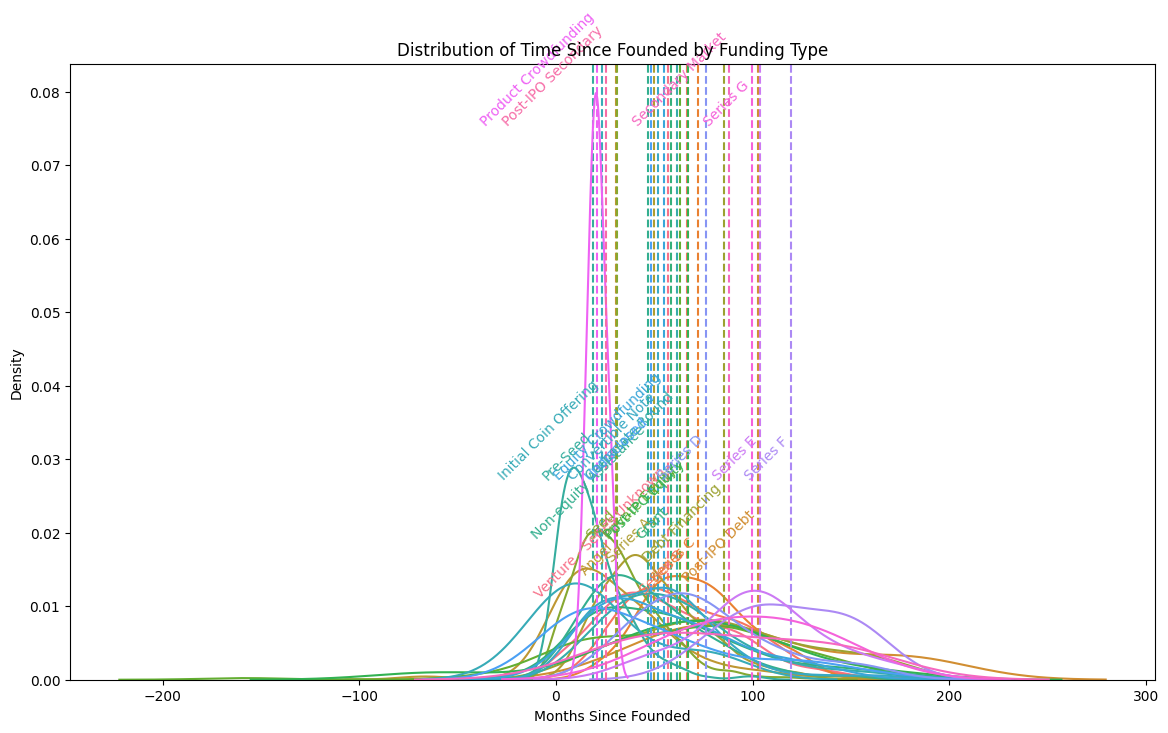

In [93]:
# Define a color palette for the funding rounds
funding_types = filtered_df['Last Funding Type'].unique()
palette = sns.color_palette("husl", len(funding_types))

# Create a bell curve (distribution plot) for each funding type
plt.figure(figsize=(14, 8))

for i, funding_type in enumerate(funding_types):
    subset = filtered_df[filtered_df['Last Funding Type'] == funding_type]
    sns.kdeplot(subset['Months Since Founded'], label=funding_type, color=palette[i])
    
    # Calculate the mean
    mean_value = subset['Months Since Founded'].mean()
    
    # Plot the mean line
    plt.axvline(mean_value, linestyle='--', color=palette[i])
    
    # Label the mean line
    plt.text(mean_value, plt.ylim()[1] * 0.9, funding_type, horizontalalignment='right', color=palette[i], rotation=45)

plt.title('Distribution of Time Since Founded by Funding Type')
plt.xlabel('Months Since Founded')
plt.ylabel('Density')

# Save the figure to the specified file path
output_file_path = "/Users/andreas/Desktop/03 - Le Wagon/distribution_of_time_since_founded_by_funding_type.png"
plt.savefig(output_file_path)

plt.show()


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convert date columns to datetime
df['Founded Date'] = pd.to_datetime(df['Founded Date'], errors='coerce')
df['Last Funding Date'] = pd.to_datetime(df['Last Funding Date'], errors='coerce')

# Calculate the number of months passed since founding for each funding round
df['Months Since Founded'] = ((df['Last Funding Date'] - df['Founded Date']).dt.days) / 30

# Define the funding types we are interested in
desired_funding_types = ['Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series F', 'Series G', 'Private Equity']

# Filter the dataframe to include only the desired funding types
filtered_df = df[df['Last Funding Type'].isin(desired_funding_types)].dropna(subset=['Months Since Founded', 'Last Funding Type'])

# Display the first few rows to check the calculation
#print(filtered_df[['Organization Name', 'Founded Date', 'Last Funding Type', 'Last Funding Date', 'Months Since Founded']].head())

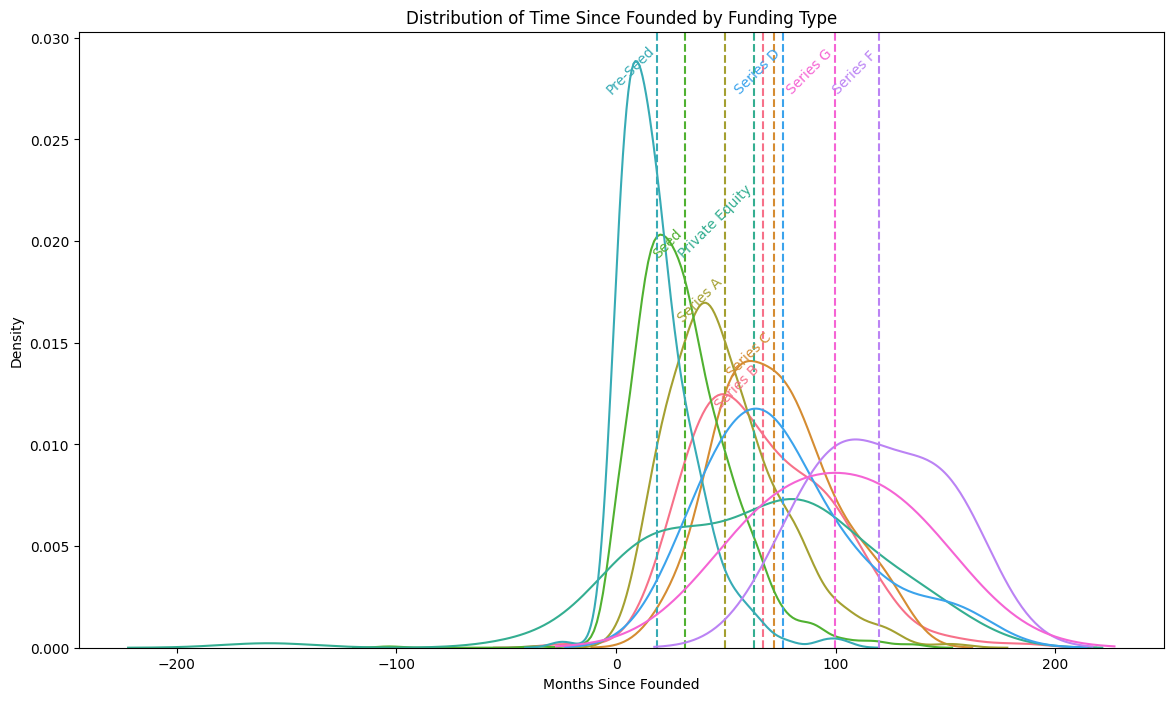

In [96]:
# Define a color palette for the funding rounds
funding_types = filtered_df['Last Funding Type'].unique()
palette = sns.color_palette("husl", len(funding_types))

# Create a bell curve (distribution plot) for each funding type
plt.figure(figsize=(14, 8))

for i, funding_type in enumerate(funding_types):
    subset = filtered_df[filtered_df['Last Funding Type'] == funding_type]
    sns.kdeplot(subset['Months Since Founded'], label=funding_type, color=palette[i])
    
    # Calculate the mean
    mean_value = subset['Months Since Founded'].mean()
    
    # Plot the mean line
    plt.axvline(mean_value, linestyle='--', color=palette[i])
    
    # Label the mean line
    plt.text(mean_value, plt.ylim()[1] * 0.9, funding_type, horizontalalignment='right', color=palette[i], rotation=45)

plt.title('Distribution of Time Since Founded by Funding Type')
plt.xlabel('Months Since Founded')
plt.ylabel('Density')

# Save the figure to the specified file path
output_file_path = "/Users/andreas/Desktop/03 - Le Wagon/distribution_of_time_since_founded_by_funding_type.png"
plt.savefig(output_file_path)

plt.show()

In [110]:
import pandas as pd

# Convert 'Industries' and 'Industry Groups' columns to strings and split by commas
df['Industries'] = df['Industries'].astype(str).str.split(', ')
df['Industry Groups'] = df['Industry Groups'].astype(str).str.split(', ')

# Explode the lists into separate rows
df_exploded_industries = df.explode('Industries')
df_exploded_industry_groups = df.explode('Industry Groups')

# Combine the exploded data
df_exploded_industries = df_exploded_industries[['Organization Name', 'Industries']]
df_exploded_industry_groups = df_exploded_industry_groups[['Organization Name', 'Industry Groups']]

df_exploded_industries.columns = ['Organization Name', 'Industry']
df_exploded_industry_groups.columns = ['Organization Name', 'Industry']

df_combined = pd.concat([df_exploded_industries, df_exploded_industry_groups], ignore_index=True)
df_combined.dropna(subset=['Industry'], inplace=True)

# Display the first few rows to verify the explosion
print(df_combined.head())

  Organization Name               Industry
0            air up         ["['Consumer'"
1            air up  "'Food and Beverage'"
2            air up           "'Retail']"]
3    infinite roots    ["['Biotechnology'"
4    infinite roots  "'Food and Beverage'"


In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the industry data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_combined['Industry'])


In [112]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
num_clusters = 15  # Adjust this based on the number of umbrella industries
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_combined['Cluster'] = kmeans.fit_predict(X)

# Display cluster assignments
print(df_combined[['Industry', 'Cluster']].head(20))


/Users/andreas/.pyenv/versions/3.10.6/envs/startup_success_predictor/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                            Industry  Cluster
0                     ["['Consumer'"        0
1              "'Food and Beverage'"        4
2                       "'Retail']"]        0
3                ["['Biotechnology'"        0
4              "'Food and Beverage'"        4
5                  "'Health Care']"]       12
6                      ["['Battery'"        0
7                 "'Energy Storage'"        0
8                "'Manufacturing']"]        6
9                    ["['Aerospace'"        0
10        "'Information Technology'"       11
11                "'Space Travel']"]        0
12              ["['Cyber Security'"        0
13                          "'SaaS'"        0
14                    "'Security']"]        0
15  ["['Human Computer Interaction'"        0
16         "'Industrial Automation'"        0
17         "'Innovation Management'"        0
18              "'Machine Learning'"        0
19                 "'Manufacturing'"        6


In [113]:
# Manually map clusters to umbrella industries based on inspection
cluster_to_umbrella = {
    0: 'Technology & Software',
    1: 'Consumer Goods & Retail',
    2: 'Media & Entertainment',
    3: 'Professional Services',
    4: 'Financial Services',
    5: 'Industrial & Manufacturing',
    6: 'Healthcare & Biotechnology',
    7: 'Education & Training',
    8: 'Community & Lifestyle',
    9: 'Food & Beverage',
    10: 'Transportation & Logistics',
    11: 'Real Estate & Construction',
    12: 'Sports & Recreation',
    13: 'Government & Public Services',
    14: 'Travel & Hospitality'
    # Adjust this mapping based on the actual clustering results
}

# Apply the cluster to umbrella industry mapping
df_combined['Umbrella Industry'] = df_combined['Cluster'].map(cluster_to_umbrella)


In [116]:
df_combined.head(20)

,Organization Name,Industry,Cluster,Umbrella Industry
0,air up,"[""['Consumer'""",0,Technology & Software
1,air up,"""'Food and Beverage'""",4,Financial Services
2,air up,"""'Retail']""]",0,Technology & Software
3,infinite roots,"[""['Biotechnology'""",0,Technology & Software
4,infinite roots,"""'Food and Beverage'""",4,Financial Services
5,infinite roots,"""'Health Care']""]",12,Sports & Recreation
6,instagrid,"[""['Battery'""",0,Technology & Software
7,instagrid,"""'Energy Storage'""",0,Technology & Software
8,instagrid,"""'Manufacturing']""]",6,Healthcare & Biotechnology
9,isar aerospace,"[""['Aerospace'""",0,Technology & Software


In [118]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Convert 'Industries' and 'Industry Groups' columns to strings and split by commas
df['Industries'] = df['Industries'].astype(str).str.split(', ')
df['Industry Groups'] = df['Industry Groups'].astype(str).str.split(', ')

# Explode the lists into separate rows
df_exploded_industries = df.explode('Industries')
df_exploded_industry_groups = df.explode('Industry Groups')

# Combine the exploded data
df_exploded_industries = df_exploded_industries[['Organization Name', 'Industries']]
df_exploded_industry_groups = df_exploded_industry_groups[['Organization Name', 'Industry Groups']]

df_exploded_industries.columns = ['Organization Name', 'Industry']
df_exploded_industry_groups.columns = ['Organization Name', 'Industry']

df_combined = pd.concat([df_exploded_industries, df_exploded_industry_groups], ignore_index=True)
df_combined.dropna(subset=['Industry'], inplace=True)

In [119]:
# Vectorize the industry data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_combined['Industry'])

# Perform KMeans clustering
num_clusters = 15  # Adjust this based on the number of umbrella industries
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_combined['Cluster'] = kmeans.fit_predict(X)

# Manually map clusters to umbrella industries based on inspection
cluster_to_umbrella = {
    0: 'Technology & Software',
    1: 'Consumer Goods & Retail',
    2: 'Media & Entertainment',
    3: 'Professional Services',
    4: 'Financial Services',
    5: 'Industrial & Manufacturing',
    6: 'Healthcare & Biotechnology',
    7: 'Education & Training',
    8: 'Community & Lifestyle',
    9: 'Food & Beverage',
    10: 'Transportation & Logistics',
    11: 'Real Estate & Construction',
    12: 'Sports & Recreation',
    13: 'Government & Public Services',
    14: 'Travel & Hospitality'
}

# Apply the cluster to umbrella industry mapping
df_combined['Umbrella Industry'] = df_combined['Cluster'].map(cluster_to_umbrella)

/Users/andreas/.pyenv/versions/3.10.6/envs/startup_success_predictor/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [120]:
# Aggregate umbrella industry by company
df_combined_agg = df_combined.groupby('Organization Name')['Umbrella Industry'].apply(list).reset_index()

# Function to resolve ties using only 'Industry Groups' column
def resolve_tie_with_industry_groups(company, df_combined):
    industry_group_only = df_combined[df_combined['Organization Name'] == company]
    industry_group_only = industry_group_only[industry_group_only['Industry'].isin(df_exploded_industry_groups['Industry'])]
    if len(industry_group_only) > 0:
        return Counter(industry_group_only['Umbrella Industry']).most_common(1)[0][0]
    return None

# Function to assign majority umbrella industry and handle ties
def assign_majority_umbrella(row, df_combined):
    umbrella_counts = Counter(row['Umbrella Industry'])
    most_common = umbrella_counts.most_common()
    if len(most_common) == 1 or most_common[0][1] > most_common[1][1]:
        return most_common[0][0]
    else:
        resolved_umbrella = resolve_tie_with_industry_groups(row['Organization Name'], df_combined)
        if resolved_umbrella:
            return resolved_umbrella
        return row['Umbrella Industry'][0]  # Fallback to the first occurrence

df_combined_agg['Resolved Umbrella Industry'] = df_combined_agg.apply(assign_majority_umbrella, axis=1, df_combined=df_combined)

# Merge the resolved umbrella industry back to the original combined DataFrame
df_combined = df_combined.merge(df_combined_agg[['Organization Name', 'Resolved Umbrella Industry']], on='Organization Name', how='left')
df_combined['Umbrella Industry'] = df_combined['Resolved Umbrella Industry']

# Remove the temporary 'Resolved Umbrella Industry' column
df_combined.drop(columns=['Resolved Umbrella Industry'], inplace=True)

# Merge the umbrella industry back to the original DataFrame
df_final = df.merge(df_combined[['Organization Name', 'Umbrella Industry']], on='Organization Name', how='left')

# Display the first few rows to check the assignment
print(df_final[['Organization Name', 'Industries', 'Industry Groups', 'Umbrella Industry']].head())

  Organization Name                                         Industries  \
0            air up  [['["[\'Consumer\'"', '"\'Food and Beverage\'"...   
1            air up  [['["[\'Consumer\'"', '"\'Food and Beverage\'"...   
2            air up  [['["[\'Consumer\'"', '"\'Food and Beverage\'"...   
3            air up  [['["[\'Consumer\'"', '"\'Food and Beverage\'"...   
4            air up  [['["[\'Consumer\'"', '"\'Food and Beverage\'"...   

                                     Industry Groups   Umbrella Industry  
0  [['["[\'Commerce and Shopping\'"', '"\'Food an...  Financial Services  
1  [['["[\'Commerce and Shopping\'"', '"\'Food an...  Financial Services  
2  [['["[\'Commerce and Shopping\'"', '"\'Food an...  Financial Services  
3  [['["[\'Commerce and Shopping\'"', '"\'Food an...  Financial Services  
4  [['["[\'Commerce and Shopping\'"', '"\'Food an...  Financial Services  


In [121]:
df_final.head()

,Organization Name,Organization Name URL,IPO Status,Company Type,Last Funding Type,Industries,Headquarters Location,Founded Date,Founded Date Precision,Full Description,...,Non-equity Assistance,Equity Crowdfunding,Debt Financing,Secondary Market,Convertible Note,Product Crowdfunding,Post-IPO Secondary,Initial Coin Offering,Months Since Founded,Umbrella Industry
0,air up,https://www.crunchbase.com/organization/air-up,Private,For Profit,Venture - Series Unknown,"[['[""[\'Consumer\'""', '""\'Food and Beverage\'""...","Munich, Bayern, Germany",2018-01-01,year,Air up is a provider of drinking bottle system...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.533333,Financial Services
1,air up,https://www.crunchbase.com/organization/air-up,Private,For Profit,Venture - Series Unknown,"[['[""[\'Consumer\'""', '""\'Food and Beverage\'""...","Munich, Bayern, Germany",2018-01-01,year,Air up is a provider of drinking bottle system...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.533333,Financial Services
2,air up,https://www.crunchbase.com/organization/air-up,Private,For Profit,Venture - Series Unknown,"[['[""[\'Consumer\'""', '""\'Food and Beverage\'""...","Munich, Bayern, Germany",2018-01-01,year,Air up is a provider of drinking bottle system...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.533333,Financial Services
3,air up,https://www.crunchbase.com/organization/air-up,Private,For Profit,Venture - Series Unknown,"[['[""[\'Consumer\'""', '""\'Food and Beverage\'""...","Munich, Bayern, Germany",2018-01-01,year,Air up is a provider of drinking bottle system...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.533333,Financial Services
4,air up,https://www.crunchbase.com/organization/air-up,Private,For Profit,Venture - Series Unknown,"[['[""[\'Consumer\'""', '""\'Food and Beverage\'""...","Munich, Bayern, Germany",2018-01-01,year,Air up is a provider of drinking bottle system...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.533333,Financial Services


/Users/andreas/.pyenv/versions/3.10.6/envs/startup_success_predictor/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               Umbrella Industry  Count
0          Technology & Software  64996
1     Real Estate & Construction   5394
2          Media & Entertainment   2163
3           Education & Training   1982
4   Government & Public Services   1866
5            Sports & Recreation   1581
6     Transportation & Logistics   1579
7     Healthcare & Biotechnology   1578
8             Financial Services    975
9          Community & Lifestyle    376
10    Industrial & Manufacturing    361
11          Travel & Hospitality    263
12         Professional Services    196
13       Consumer Goods & Retail     91
14               Food & Beverage     40


/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/3941189933.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Umbrella Industry', data=umbrella_sizes, palette='viridis')


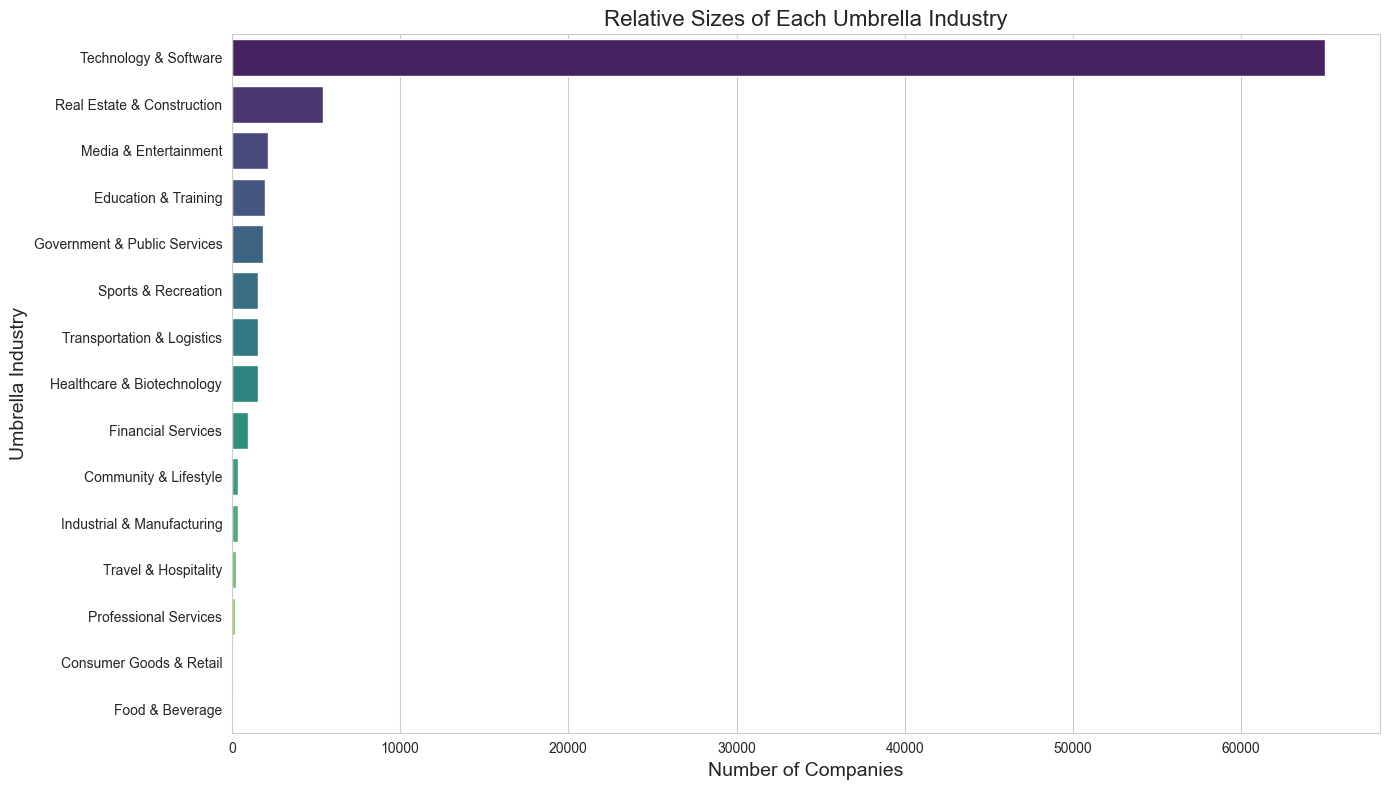

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Convert 'Industries' and 'Industry Groups' columns to strings and split by commas
df['Industries'] = df['Industries'].astype(str).str.split(', ')
df['Industry Groups'] = df['Industry Groups'].astype(str).str.split(', ')

# Explode the lists into separate rows
df_exploded_industries = df.explode('Industries')
df_exploded_industry_groups = df.explode('Industry Groups')

# Combine the exploded data
df_exploded_industries = df_exploded_industries[['Organization Name', 'Industries']]
df_exploded_industry_groups = df_exploded_industry_groups[['Organization Name', 'Industry Groups']]

df_exploded_industries.columns = ['Organization Name', 'Industry']
df_exploded_industry_groups.columns = ['Organization Name', 'Industry']

df_combined = pd.concat([df_exploded_industries, df_exploded_industry_groups], ignore_index=True)
df_combined.dropna(subset=['Industry'], inplace=True)

# Vectorize the industry data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_combined['Industry'])

# Perform KMeans clustering
num_clusters = 15  # Adjust this based on the number of umbrella industries
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_combined['Cluster'] = kmeans.fit_predict(X)

# Manually map clusters to umbrella industries based on inspection
cluster_to_umbrella = {
    0: 'Technology & Software',
    1: 'Consumer Goods & Retail',
    2: 'Media & Entertainment',
    3: 'Professional Services',
    4: 'Financial Services',
    5: 'Industrial & Manufacturing',
    6: 'Healthcare & Biotechnology',
    7: 'Education & Training',
    8: 'Community & Lifestyle',
    9: 'Food & Beverage',
    10: 'Transportation & Logistics',
    11: 'Real Estate & Construction',
    12: 'Sports & Recreation',
    13: 'Government & Public Services',
    14: 'Travel & Hospitality'
}

# Apply the cluster to umbrella industry mapping
df_combined['Umbrella Industry'] = df_combined['Cluster'].map(cluster_to_umbrella)

# Aggregate umbrella industry by company
df_combined_agg = df_combined.groupby('Organization Name')['Umbrella Industry'].apply(list).reset_index()

# Function to resolve ties using only 'Industry Groups' column
def resolve_tie_with_industry_groups(company, df_combined):
    industry_group_only = df_combined[df_combined['Organization Name'] == company]
    industry_group_only = industry_group_only[industry_group_only['Industry'].isin(df_exploded_industry_groups['Industry'])]
    if len(industry_group_only) > 0:
        return Counter(industry_group_only['Umbrella Industry']).most_common(1)[0][0]
    return None

# Function to assign majority umbrella industry and handle ties
def assign_majority_umbrella(row, df_combined):
    umbrella_counts = Counter(row['Umbrella Industry'])
    most_common = umbrella_counts.most_common()
    if len(most_common) == 1 or most_common[0][1] > most_common[1][1]:
        return most_common[0][0]
    else:
        resolved_umbrella = resolve_tie_with_industry_groups(row['Organization Name'], df_combined)
        if resolved_umbrella:
            return resolved_umbrella
        return row['Umbrella Industry'][0]  # Fallback to the first occurrence

df_combined_agg['Resolved Umbrella Industry'] = df_combined_agg.apply(assign_majority_umbrella, axis=1, df_combined=df_combined)

# Merge the resolved umbrella industry back to the original combined DataFrame
df_combined = df_combined.merge(df_combined_agg[['Organization Name', 'Resolved Umbrella Industry']], on='Organization Name', how='left')
df_combined['Umbrella Industry'] = df_combined['Resolved Umbrella Industry']

# Remove the temporary 'Resolved Umbrella Industry' column
df_combined.drop(columns=['Resolved Umbrella Industry'], inplace=True)

# Merge the umbrella industry back to the original DataFrame
df_final = df.merge(df_combined[['Organization Name', 'Umbrella Industry']], on='Organization Name', how='left')

# Calculate the size of each umbrella industry
umbrella_sizes = df_combined['Umbrella Industry'].value_counts().reset_index()
umbrella_sizes.columns = ['Umbrella Industry', 'Count']

# Display the umbrella sizes
print(umbrella_sizes)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Umbrella Industry', data=umbrella_sizes, palette='viridis')

# Add titles and labels
plt.title('Relative Sizes of Each Umbrella Industry', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('Umbrella Industry', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [178]:
df_final = pd.read_csv("/Users/andreas/Desktop/03 - Le Wagon/final_data.v2.csv")

In [179]:
df_final.head(5)

,Unnamed: 0,Organization Name,IPO Status,Number of Founders,Company Type,CB Rank (Company),Operating Status,Industry Groups,Number of Employees,Estimated Revenue Range,...,private_equity_fund,seed_to_pre_ratio,a_to_seed_ratio,b_to_a_ratio,c_to_b_ratio,d_to_c_ratio,e_to_d_ratio,pe_to_e_ratio,total_funding_usd,last_funding_type
0,0,air up,Private,5.0,For Profit,"1,347",Active,"Commerce and Shopping, Food and Beverage, Other",251-500,$100M to $500M,...,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,67922929.0,Venture - Series Unknown
1,1,infinite roots,Private,1.0,For Profit,"1,875",Active,"Biotechnology, Food and Beverage, Health Care,...",51-100,NaN,...,NaN,0.0,0.0,5.300000,0.000000,0.0,0.0,0.0,86661948.0,Series B
2,2,instagrid,Private,2.0,For Profit,"1,950",Active,"Energy, Manufacturing",101-250,$1M to $10M,...,NaN,0.0,0.0,3.411765,3.014828,0.0,0.0,0.0,137401184.0,Series C
3,3,isar aerospace,Private,3.0,For Profit,"2,015",Active,"Information Technology, Science and Engineerin...",251-500,$10M to $50M,...,NaN,0.0,0.0,5.000000,0.000000,0.0,0.0,0.0,350641701.0,Series C
4,4,sosafe cyber security awareness,Private,3.0,For Profit,"2,054",Active,"Information Technology, Privacy and Security, ...",251-500,$50M to $100M,...,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,73000000.0,Series B


In [181]:
df_final["series_c_fund"]

0              NaN
1              NaN
2       87430000.0
3              NaN
4              NaN
           ...    
2184           NaN
2185           NaN
2186           NaN
2187           NaN
2188           NaN
Name: series_c_fund, Length: 2189, dtype: float64

In [182]:
df_final.columns

Index(['Unnamed: 0', 'Organization Name', 'IPO Status', 'Number of Founders',
       'Company Type', 'CB Rank (Company)', 'Operating Status',
       'Industry Groups', 'Number of Employees', 'Estimated Revenue Range',
       'Number of Exits', 'Number of Sub-Orgs', 'city', 'state',
       'funding_status', 'revenue_range', 'no_employees', 'no_founders',
       'industry_groups', 'website', 'phone', 'email', 'linkedin', 'twitter',
       'facebook', 'articles', 'founded_year', 'last_funding_year',
       'exit_year', 'closed_year', 'no_investors', 'no_fund_rounds',
       'acquired', 'private_ipo', 'company_type', 'operting_status',
       'no_lead_investors', 'no_sub_orgs', 'no_exits', 'has_preseed',
       'has_seed', 'has_series_a', 'has_series_b', 'has_series_c',
       'has_series_d', 'has_series_e', 'has_angel', 'has_debt_financing',
       'has_grant', 'has_corporate_round', 'has_series_x', 'has_other_funding',
       'preseed_fund', 'seed_fund', 'series_a_fund', 'series_b_fund',

In [183]:
df_final.head()

,Unnamed: 0,Organization Name,IPO Status,Number of Founders,Company Type,CB Rank (Company),Operating Status,Industry Groups,Number of Employees,Estimated Revenue Range,...,private_equity_fund,seed_to_pre_ratio,a_to_seed_ratio,b_to_a_ratio,c_to_b_ratio,d_to_c_ratio,e_to_d_ratio,pe_to_e_ratio,total_funding_usd,last_funding_type
0,0,air up,Private,5.0,For Profit,"1,347",Active,"Commerce and Shopping, Food and Beverage, Other",251-500,$100M to $500M,...,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,67922929.0,Venture - Series Unknown
1,1,infinite roots,Private,1.0,For Profit,"1,875",Active,"Biotechnology, Food and Beverage, Health Care,...",51-100,NaN,...,NaN,0.0,0.0,5.300000,0.000000,0.0,0.0,0.0,86661948.0,Series B
2,2,instagrid,Private,2.0,For Profit,"1,950",Active,"Energy, Manufacturing",101-250,$1M to $10M,...,NaN,0.0,0.0,3.411765,3.014828,0.0,0.0,0.0,137401184.0,Series C
3,3,isar aerospace,Private,3.0,For Profit,"2,015",Active,"Information Technology, Science and Engineerin...",251-500,$10M to $50M,...,NaN,0.0,0.0,5.000000,0.000000,0.0,0.0,0.0,350641701.0,Series C
4,4,sosafe cyber security awareness,Private,3.0,For Profit,"2,054",Active,"Information Technology, Privacy and Security, ...",251-500,$50M to $100M,...,NaN,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,73000000.0,Series B


In [132]:
df_final.describe()

,Unnamed: 0,Number of Founders,Number of Exits,Number of Sub-Orgs,no_founders,website,phone,email,linkedin,twitter,...,series_e_fund,private_equity_fund,seed_to_pre_ratio,a_to_seed_ratio,b_to_a_ratio,c_to_b_ratio,d_to_c_ratio,e_to_d_ratio,pe_to_e_ratio,total_funding_usd
count,2189.000000,1965.000000,12.000000,39.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,...,2.400000e+01,4.500000e+01,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2.189000e+03
mean,1094.000000,2.451908,2.500000,1.435897,2.303335,0.996345,0.602558,0.874829,0.967565,0.599817,...,1.481750e+08,1.668241e+08,0.761895,0.728866,0.322361,0.098763,0.051475,0.032730,0.010413,5.844076e+07
std,632.054191,1.223644,3.343923,0.882427,1.240058,0.060357,0.489481,0.330989,0.177193,0.490047,...,1.771500e+08,2.557662e+08,5.743969,3.206692,1.243797,0.595941,0.489711,0.535561,0.190539,4.807582e+08
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.500000e+07,1.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,547.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,4.075000e+07,1.400000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.765530e+06
50%,1094.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.000000e+07,5.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.310832e+06
75%,1641.000000,3.000000,1.250000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.812500e+08,2.000000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+07
max,2188.000000,9.000000,11.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.750000e+08,1.200000e+09,145.000000,96.000000,25.000000,11.419355,11.250000,15.693693,5.048780,1.581158e+10


In [130]:
df_final.corr()

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2875322423.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.corr()


,Unnamed: 0,Number of Founders,Number of Exits,Number of Sub-Orgs,no_founders,website,phone,email,linkedin,twitter,...,series_e_fund,private_equity_fund,seed_to_pre_ratio,a_to_seed_ratio,b_to_a_ratio,c_to_b_ratio,d_to_c_ratio,e_to_d_ratio,pe_to_e_ratio,total_funding_usd
Unnamed: 0,1.000000,0.003496,-0.033543,0.105389,0.043892,-0.017803,0.245487,0.072966,-0.064437,0.179788,...,-0.205409,-0.108120,-0.052170,0.023304,0.072301,0.043799,0.054685,0.016082,0.003480,0.007300
Number of Founders,0.003496,1.000000,0.480402,0.236497,1.000000,-0.002176,-0.045983,0.061139,0.004215,0.091753,...,0.066720,0.079180,0.008168,0.105551,0.096817,0.140652,0.061978,0.038226,0.049646,0.092065
Number of Exits,-0.033543,0.480402,1.000000,0.727607,0.484274,NaN,0.270501,0.141264,NaN,0.141264,...,-1.000000,0.479643,NaN,-0.141264,0.311337,0.271662,-0.034346,0.630251,0.555007,0.772273
Number of Sub-Orgs,0.105389,0.236497,0.727607,1.000000,0.277936,NaN,0.117414,-0.017110,NaN,0.050208,...,-0.382286,0.373867,0.061360,-0.121013,0.157423,0.445701,0.235436,0.442328,0.790492,0.488640
no_founders,0.043892,1.000000,0.484274,0.277936,1.000000,0.008712,-0.026428,0.098116,0.044797,0.157730,...,0.066720,-0.095956,0.016998,0.122201,0.121232,0.151153,0.070506,0.043054,0.052957,0.019592
website,-0.017803,-0.002176,NaN,NaN,0.008712,1.000000,0.012693,0.045724,0.117115,0.027791,...,NaN,0.093481,0.008035,0.013769,0.015700,0.010039,0.006368,0.003702,0.003311,0.006297
phone,0.245487,-0.045983,0.270501,0.117414,-0.026428,0.012693,1.000000,0.299311,0.025197,0.157843,...,-0.009258,0.242506,-0.065755,-0.008873,0.082492,0.101490,0.036825,0.019097,0.033676,0.035901
email,0.072966,0.061139,0.141264,-0.017110,0.098116,0.045724,0.299311,1.000000,0.094393,0.178504,...,-0.403784,0.162254,-0.010762,0.012536,0.041292,0.035919,0.035540,0.006484,0.019405,-0.003405
linkedin,-0.064437,0.004215,NaN,NaN,0.044797,0.117115,0.025197,0.094393,1.000000,0.087305,...,NaN,NaN,0.023008,0.025538,0.045908,0.017077,0.019250,0.011192,0.010009,0.019896
twitter,0.179788,0.091753,0.141264,0.050208,0.157730,0.027791,0.157843,0.178504,0.087305,1.000000,...,0.128864,0.114071,0.025759,0.078042,0.105818,0.114157,0.067982,0.046360,0.019938,0.051966


In [134]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2189 non-null   int64  
 1   Organization Name        2189 non-null   object 
 2   IPO Status               2189 non-null   object 
 3   Number of Founders       1965 non-null   float64
 4   Company Type             2183 non-null   object 
 5   CB Rank (Company)        2182 non-null   object 
 6   Operating Status         2189 non-null   object 
 7   Industry Groups          2173 non-null   object 
 8   Number of Employees      2189 non-null   object 
 9   Estimated Revenue Range  1635 non-null   object 
 10  Number of Exits          12 non-null     float64
 11  Number of Sub-Orgs       39 non-null     float64
 12  city                     2189 non-null   object 
 13  state                    2189 non-null   object 
 14  funding_status          

In [143]:
# Define the columns for the funding rounds
funding_columns = [
    'preseed_fund', 'seed_fund', 'series_a_fund', 'series_b_fund', 
    'series_c_fund', 'series_d_fund', 'series_e_fund', 'private_equity_fund'
]

# Create a summary statistics dataframe
summary_stats = df_final[funding_columns].describe(percentiles=[0.25, 0.5, 0.75]).transpose()

# Add the count of non-null values
summary_stats['count_non_null'] = df_final[funding_columns].notnull().sum()

# Rename columns for clarity
summary_stats.rename(columns={'count_non_null': 'Non-Null Count', 'min': 'Min', 'max': 'Max', 
                              '25%': '25th Percentile', '50%': 'Median (50th Percentile)', 
                              '75%': '75th Percentile'}, inplace=True)

# Display the summary statistics
summary_stats

,count,mean,std,Min,25th Percentile,Median (50th Percentile),75th Percentile,Max,Non-Null Count
preseed_fund,366.0,9.739687e+05,1.081070e+06,10000.0,200000.0,650000.0,1300000.0,7.500000e+06,366
seed_fund,1047.0,3.014386e+06,4.712399e+06,10000.0,1000000.0,2000000.0,4000000.0,1.180000e+08,1047
series_a_fund,697.0,1.114654e+07,1.481779e+07,100000.0,4000000.0,7000000.0,13500000.0,2.400000e+08,697
series_b_fund,303.0,2.864677e+07,5.316662e+07,500000.0,8000000.0,15000000.0,30000000.0,7.500000e+08,303
series_c_fund,118.0,5.544466e+07,7.801773e+07,500000.0,16175000.0,32000000.0,65000000.0,6.500000e+08,118
series_d_fund,52.0,8.571951e+07,9.159440e+07,200000.0,21750000.0,50000000.0,118700000.0,4.000000e+08,52
series_e_fund,24.0,1.481750e+08,1.771500e+08,15000000.0,40750000.0,80000000.0,181250000.0,7.750000e+08,24
private_equity_fund,45.0,1.668241e+08,2.557662e+08,150000.0,14000000.0,50000000.0,200000000.0,1.200000e+09,45


In [151]:
# Delete the specified columns from df_final
columns_to_delete = ['website', 'phone', 'email', 'linkedin', 'twitter', 'facebook', 'Number of Sub-Orgs', 'Number of Founders', 'no_sub_orgs']
df_final_cleaned = df_final.drop(columns=columns_to_delete)

# Display the updated DataFrame information to confirm changes
#df_final_cleaned.info()

In [152]:
df_final = df_final_cleaned

/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/2765246246.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Months Since Founded'] = pd.to_numeric(subset['Months Since Founded'], errors='coerce')


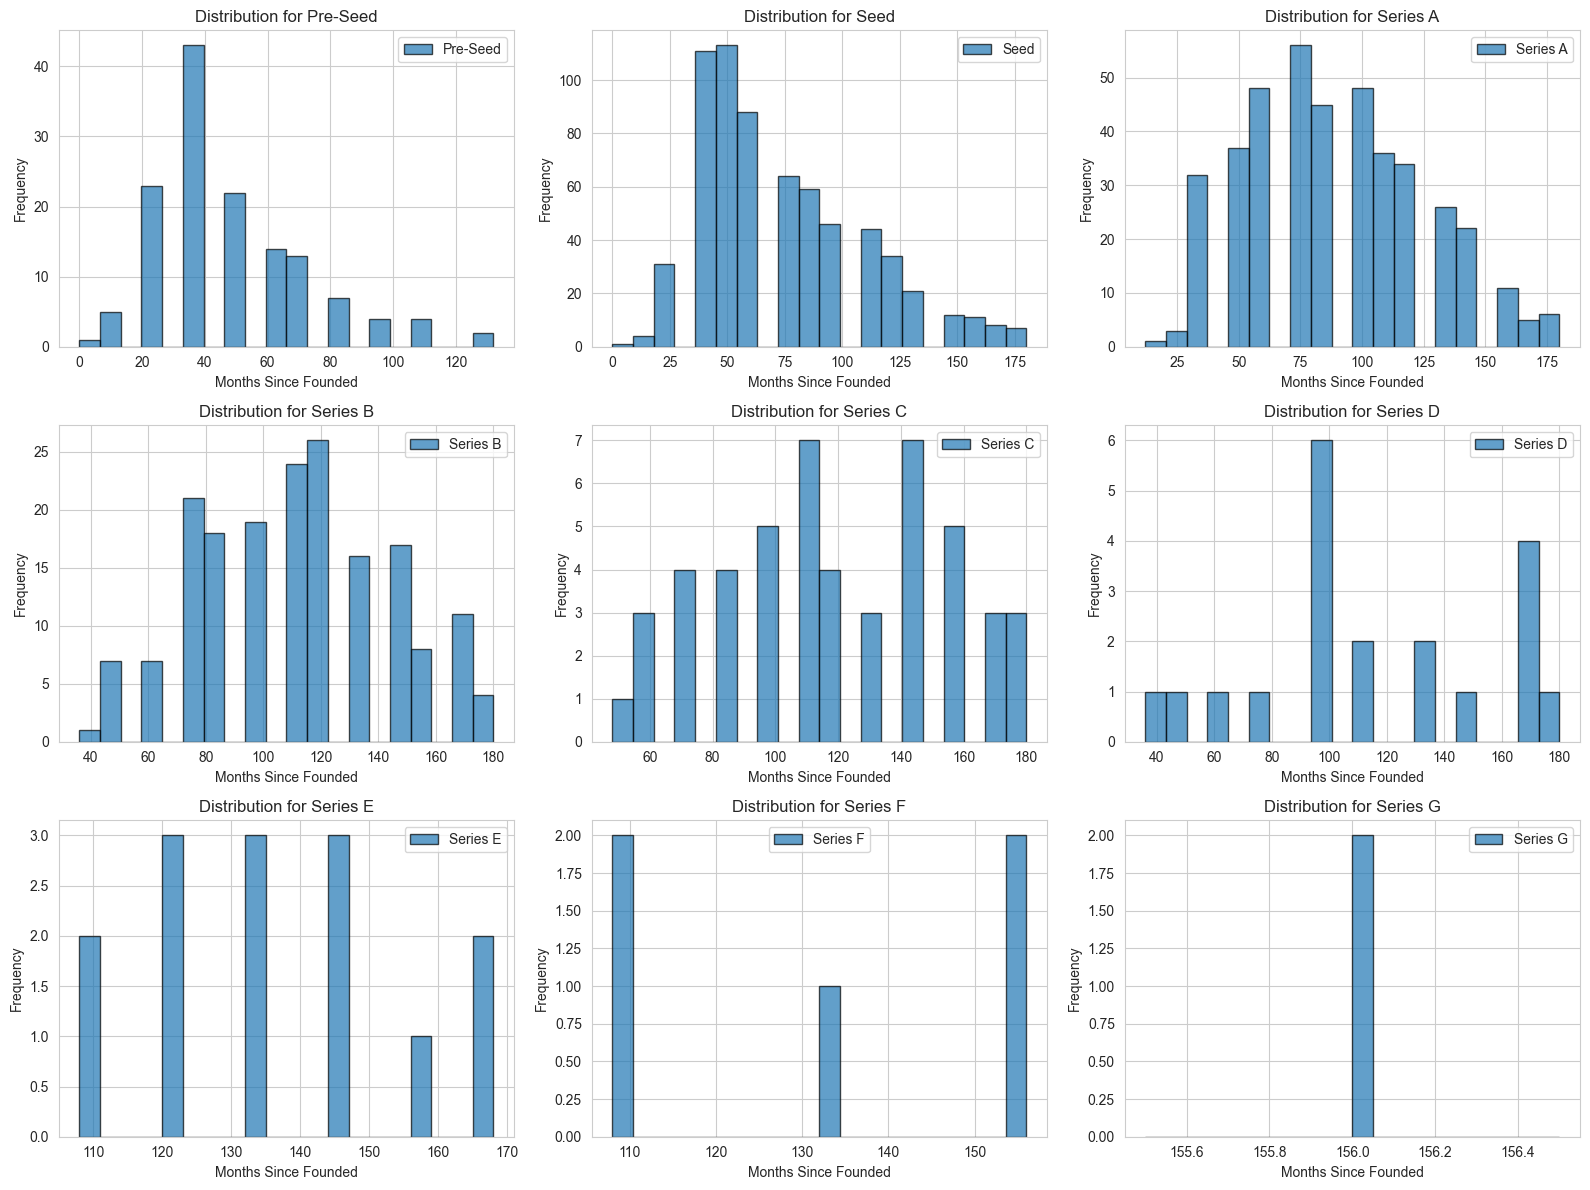

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the desired funding types
desired_funding_types = ['Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G']

# Assuming df_final is already loaded and cleaned

# Add 'Months Since Founded' column
df_final['Months Since Founded'] = (pd.to_datetime('today').year - df_final['founded_year']) * 12

# Create histogram plots for each funding type
plt.figure(figsize=(16, 12))

# Iterate through each funding type and plot the histogram
for i, funding_type in enumerate(desired_funding_types, 1):
    plt.subplot(3, 3, i)
    subset = df_final[df_final['last_funding_type'] == funding_type]
    
    # Ensure 'Months Since Founded' is numeric and finite
    subset['Months Since Founded'] = pd.to_numeric(subset['Months Since Founded'], errors='coerce')
    subset = subset[np.isfinite(subset['Months Since Founded'])]
    
    # Plot histogram
    plt.hist(subset['Months Since Founded'], bins=20, edgecolor='black', alpha=0.7, label=funding_type)
    plt.title(f'Distribution for {funding_type}')
    plt.xlabel('Months Since Founded')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/4132394396.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Months Since Founded'], label=funding_type, shade=True)
/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/4132394396.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Months Since Founded'], label=funding_type, shade=True)
/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/ipykernel_47753/4132394396.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Months Since Founded'], label=funding_type, shade=True)
/var/folders/ym/tgm8fddj1ng74fnylnp70m740000gn/T/

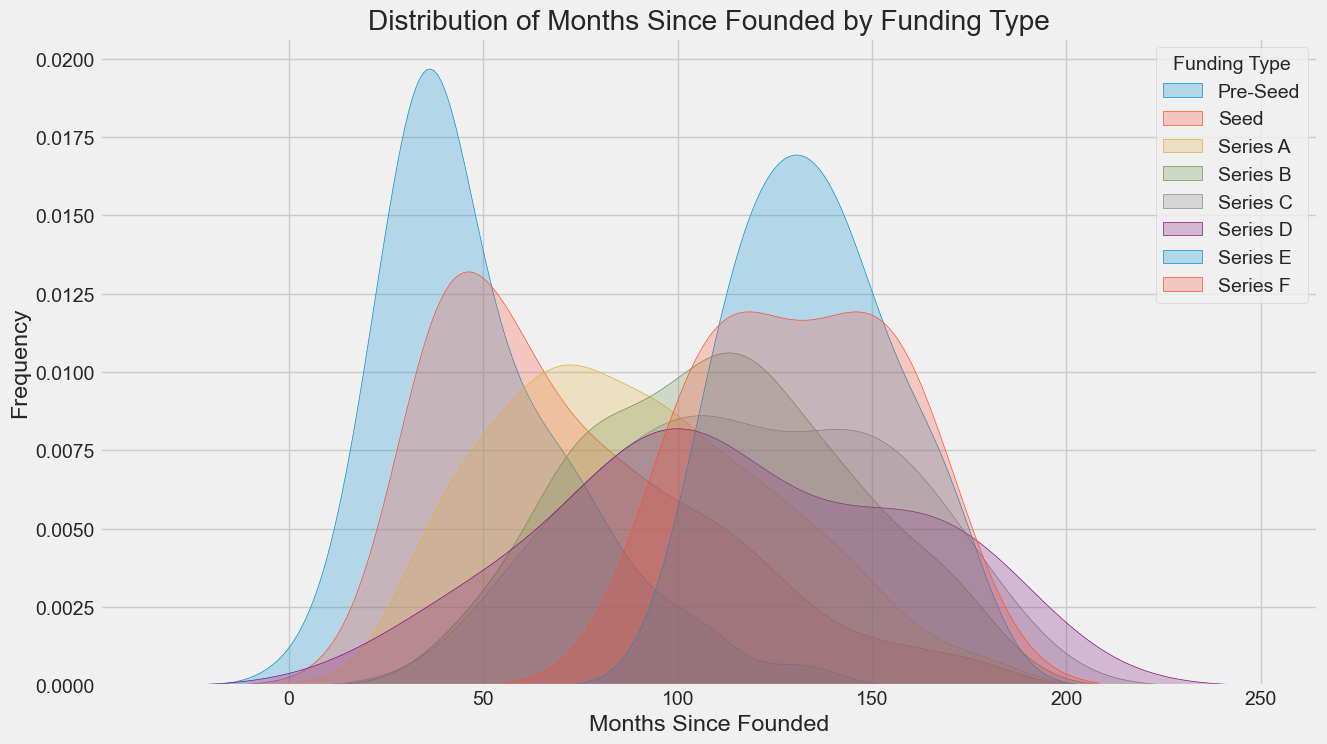

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the desired funding types
desired_funding_types = ['Pre-Seed', 'Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G']

# Assuming df_final is already loaded and cleaned

# Add 'Months Since Founded' column
df_final['Months Since Founded'] = (pd.to_datetime('today').year - df_final['founded_year']) * 12

# Filter out rows with invalid or missing values for 'Months Since Founded'
df_final = df_final[np.isfinite(df_final['Months Since Founded'])]

# Set plot style
plt.style.use('fivethirtyeight')

# Create combined KDE plot for all funding types
plt.figure(figsize=(14, 8))

# Iterate through each funding type and plot the KDE
for funding_type in desired_funding_types:
    subset = df_final[df_final['last_funding_type'] == funding_type]
    sns.kdeplot(subset['Months Since Founded'], label=funding_type, shade=True)

plt.title('Distribution of Months Since Founded by Funding Type')
plt.xlabel('Months Since Founded')
plt.ylabel('Frequency')
plt.legend(title='Funding Type')
plt.show()

In [185]:
df_final["funding_status"]

0       Early Stage Venture
1       Early Stage Venture
2        Late Stage Venture
3        Late Stage Venture
4       Early Stage Venture
               ...         
2184                   Seed
2185                   Seed
2186                   Seed
2187                   Seed
2188                    M&A
Name: funding_status, Length: 2189, dtype: object